In [24]:
## csv from https://data.ers.usda.gov/reports.aspx?ID=17827
# 10 year census data for all 50 states plus DC, US total, and Puerto Rico from 1990 to 2020

pop_data.long <- read.csv('State_census_pop_1990_to_2020.csv', header = TRUE, colClasses = 'character')
pop_data.df <- pop_data.long[ ,c('Name','Pop..1990','Pop..2000','Pop..2010','Pop..2020')]
colnames(pop_data.df) <- c('State','1990','2000','2010','2020')
pop_data.df <- pivot_longer(pop_data.df, cols = 2:5, names_to='Year' , values_to='Population')
cols <- 2:3
pop_data.df[,cols] <- lapply(pop_data.df[,cols],function(pop_data.df){as.numeric(gsub(",","",pop_data.df))})
head(pop_data.df)

State,Year,Population
<chr>,<dbl>,<dbl>
United States,1990,248790925
United States,2000,281424600
United States,2010,308745538
United States,2020,331449281
Alabama,1990,4040389
Alabama,2000,4447207


In [89]:
state_names <- unique(pop_data.df$State)
head(state_names)

[1] "United States" "Alabama"       "Alaska"        "Arizona"      
[5] "Arkansas"      "California"

In [88]:
missing_yrs <- c(1991:2019)
missing_yrs <- missing_yrs[c(1:9,11:19,21:29)]
head(missing_yrs)

[1] 1991 1992 1993 1994 1995 1996

In [90]:
# creating df of the years missing from the dataset 
missing_df = data.frame(
  col1 = character(), col2 = numeric(),stringsAsFactors = FALSE)

for (s in state_names) {
                for (y in missing_yrs) {
                    vec <- c(s, y)
                    missing_df[nrow(missing_df)+1, ] <- vec
}}

missing_df <- missing_df %>% add_column(new_col = NA)
colnames(missing_df) <- c('State', 'Year', 'Population')
missing_df$Year <- as.numeric(missing_df$Year)
missing_df$Population <- as.numeric(missing_df$Population)


In [91]:
# appending the missing data years to the data set from the census 
df <- rbind(pop_data.df, missing_df)
df <- df %>% arrange(State,Year)
head(df)

State,Year,Population
<chr>,<dbl>,<dbl>
Alabama,1990,4040389
Alabama,1991,NA
Alabama,1992,NA
Alabama,1993,NA
Alabama,1994,NA
Alabama,1995,NA


In [92]:
# linearly interpolating the missing values based on the 10 year census populations

df <- df %>%
        mutate(Population = round(na.approx(Population),0))
head(df)

State,Year,Population
<chr>,<dbl>,<dbl>
Alabama,1990,4040389
Alabama,1991,4081071
Alabama,1992,4121753
Alabama,1993,4162434
Alabama,1994,4203116
Alabama,1995,4243798


In [69]:
library(ggplot2)

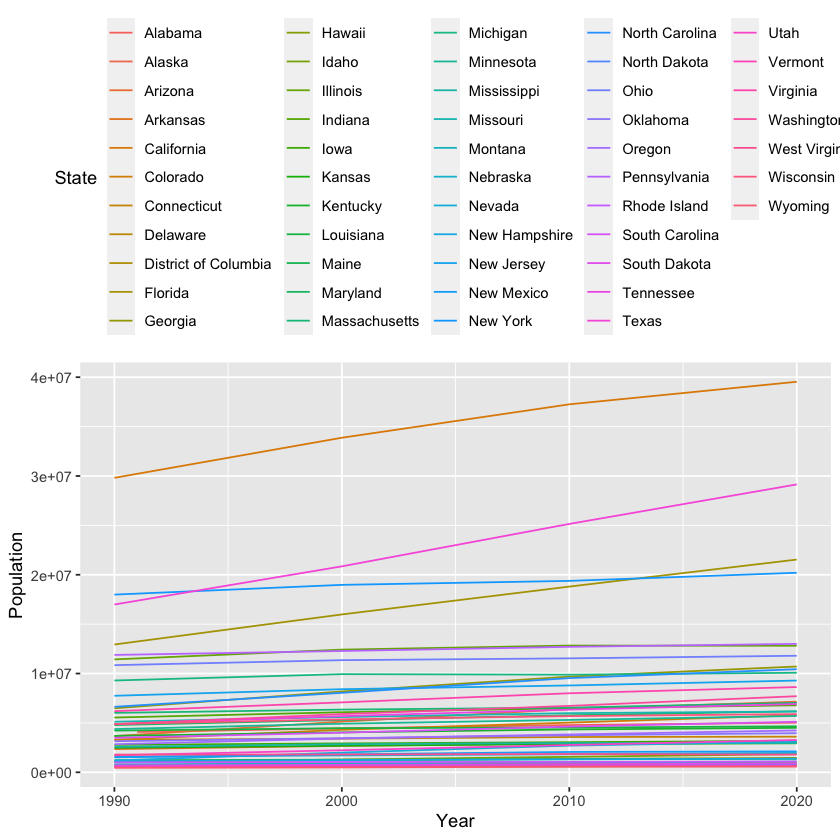

In [87]:
df <- df %>% filter(State != 'United States', State != 'Puerto Rico')
ggplot(data=df, aes(x = Year, y = Population, group=State)) + geom_line(aes(color=State)) + theme(legend.position="top")